In [4]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

# 1. 데이터 생성
- 남,여 키와 몸무게 데이터를 군집화

In [5]:
import random 
import numpy as np
import matplotlib.pyplot as plt

In [6]:
random.randint(140, 195)

177

In [15]:
data = []
for i in range(50):
    # 여자 데이터 data추가
    data.append([random.randint(40, 70), random.randint(140, 175)])
    # 남자 데이터 data추가
    data.append([random.randint(55, 95), random.randint(160, 195)])
# data

In [16]:
# 여자
# for female in data[::2]:
#     print(female, end=' ')
print('여자 : ', [female for female in data[::2]])
print('남자 : ', [male for male in data[1::2]])
print('==========================================================')
print('여자 몸무게(x축) :', [female[0] for female in data[::2]])
print('여자 키(y축) :', [female[1] for female in data[::2]])

print('남자 몸무게(x축) : ', [male[0] for male in data[1::2]])
print('남자 키 (y축) : ', [male[1] for male in data[1::2]])

여자 :  [[69, 147], [50, 172], [61, 148], [70, 175], [55, 168], [62, 156], [64, 155], [59, 145], [54, 149], [55, 149], [40, 169], [54, 156], [55, 173], [55, 175], [61, 141], [57, 147], [61, 174], [58, 155], [54, 153], [59, 159], [49, 159], [40, 154], [42, 150], [68, 145], [46, 145], [47, 155], [46, 163], [66, 173], [66, 166], [49, 167], [47, 168], [59, 163], [47, 173], [41, 159], [42, 150], [41, 161], [42, 164], [58, 158], [60, 154], [46, 154], [45, 141], [64, 167], [63, 162], [53, 164], [46, 172], [51, 156], [51, 150], [41, 175], [70, 166], [60, 142]]
남자 :  [[89, 173], [95, 183], [80, 188], [64, 166], [90, 179], [87, 170], [60, 185], [88, 169], [86, 168], [73, 189], [87, 166], [76, 174], [93, 164], [69, 163], [94, 181], [93, 182], [60, 163], [69, 170], [70, 160], [80, 167], [82, 191], [90, 183], [81, 167], [55, 189], [88, 177], [58, 170], [83, 190], [90, 168], [85, 182], [64, 173], [82, 181], [56, 187], [79, 164], [60, 163], [89, 180], [61, 164], [71, 174], [83, 165], [55, 160], [71, 19

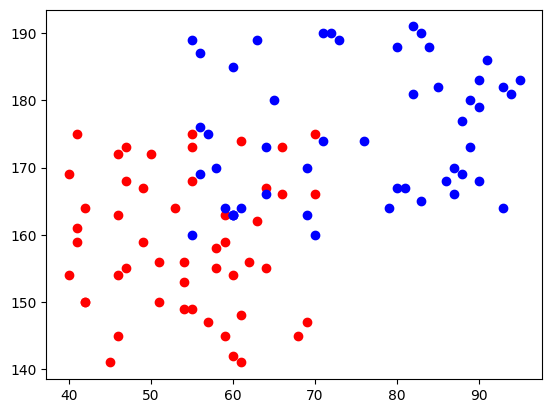

In [20]:
plt.plot([female[0] for female in data[::2]],
        [female[1] for female in data[::2]], 'o', color='r')
plt.plot([male[0] for male in data[1::2]],
        [male[1] for male in data[1::2]], 'o', color='b')
plt.show()

# 2. 군집화 로직

In [21]:
# 초기 랜덤 지점 2개
random_points = [
    [random.randint(40, 95), random.randint(140, 195)],
    [random.randint(40, 95), random.randint(140, 195)]
]
random_points

[[82, 175], [69, 178]]

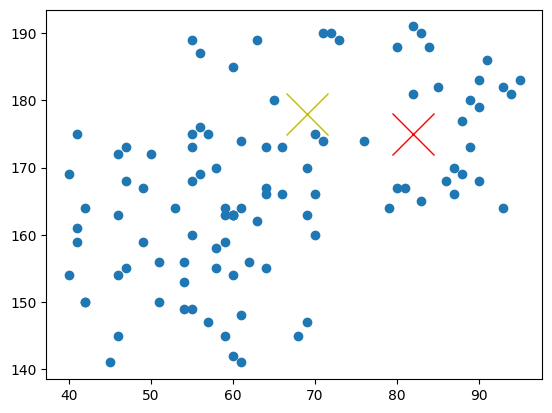

In [28]:
plt.plot([ d[0] for d in data],
        [d[1] for d in data], 'o')
plt.plot(random_points[0][0],
        random_points[0][1], 'x', color='r', markersize=30) # 기준점0(random_points[0])
plt.plot(random_points[1][0],
        random_points[1][1], 'x', color='y', markersize=30) # 기준점1(random_points[1])

In [33]:
# 두 점 거리를 return / a: [0,0]
def dist(a, b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
print(dist([3,4],[0,0]))
print(dist(random_points[0], data[0]))
print(dist(random_points[1], data[0]))

5.0
30.870698080866262
31.0


In [34]:
# random_points[0]에 가까운 그룹과 random_points[1]에 가까운 그룹을 분류
group0 = []
group1 = []
for d in data:
    if dist(random_points[0], d) < dist(random_points[1], d):
        group0.append(d)
    else:
        group1.append(d)
len(group0), len(group1)

(27, 73)

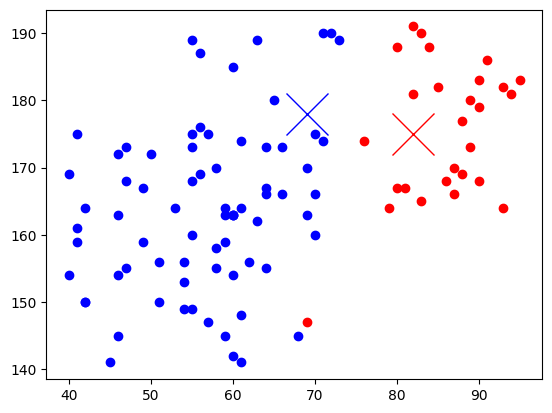

In [39]:
# group0과 group1, 기준점1, 기준점1
plt.plot([d[0] for d in group0],
         [d[1] for d in group0], 'o', color='r')
plt.plot(random_points[0][0],
        random_points[0][1], 'x', color='r', markersize=30)
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', color='b')
plt.plot(random_points[1][0],
        random_points[1][1], 'x', color='b', markersize=30)

In [47]:
# 기준점 이동 : group0의 중심점(기준점0), group1의 중심점(기준점1)
group0_meanX = np.mean([d[0] for d in group0])
group0_meanY = np.mean([d[1] for d in group0])
random_points[0] = [group0_meanX, group0_meanY]

group1_meanX = np.mean([d[0] for d in group1])
group1_meanY = np.mean([d[1] for d in group1])
random_points[1] = [group1_meanX, group1_meanY]
random_points

[[85.70370370370371, 175.2962962962963],
 [56.63013698630137, 163.93150684931507]]

In [40]:
a = [1,2,3,4]
np.mean(a)

2.5

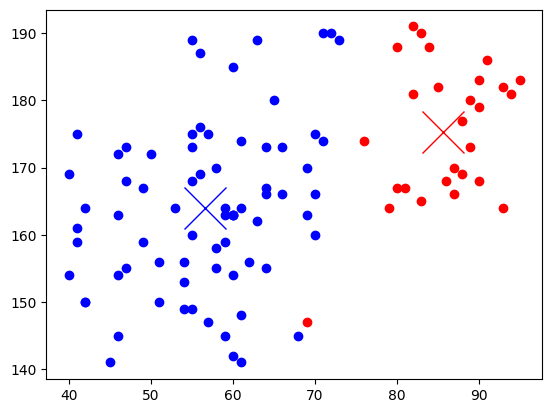

In [48]:
# group0과 group1, 기준점1, 기준점1
plt.plot([d[0] for d in group0],
         [d[1] for d in group0], 'o', color='r')
plt.plot(random_points[0][0],
        random_points[0][1], 'x', color='r', markersize=30)
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', color='b')
plt.plot(random_points[1][0],
        random_points[1][1], 'x', color='b', markersize=30)

# 3. 군집화 전체 코드(for문 이용)
- 랜덤포인트 2개 지정
- 랜덤포인트 2개 출력과 시각화(x)
- for문
    * 랜덤포인트 2지점 기준으로 group0과 group1나눔
    * 랜덤포인트 출력
    * group0의 중간점과 group1의 중간점을 랜덤포인트로 업데이트
    * 랜건 포인트 출력과 시각화

초기 기준점 : [[87, 166], [70, 172]]
1 번째 points : [[87.9, 173.7], [58.625, 165.325]]
2 번째 points : [[84.86206896551724, 177.75862068965517], [56.15492957746479, 162.6056338028169]]
3 번째 points : [[83.28125, 177.90625], [55.63235294117647, 161.86764705882354]]
4 번째 points : [[82.72727272727273, 177.96969696969697], [55.492537313432834, 161.59701492537314]]
5 번째 points : [[81.68571428571428, 177.94285714285715], [55.215384615384615, 161.1076923076923]]
6 번째 points : [[81.68571428571428, 177.94285714285715], [55.215384615384615, 161.1076923076923]]
7 번째 points : [[81.68571428571428, 177.94285714285715], [55.215384615384615, 161.1076923076923]]
8 번째 points : [[81.68571428571428, 177.94285714285715], [55.215384615384615, 161.1076923076923]]
9 번째 points : [[81.68571428571428, 177.94285714285715], [55.215384615384615, 161.1076923076923]]


(140.0, 195.0)

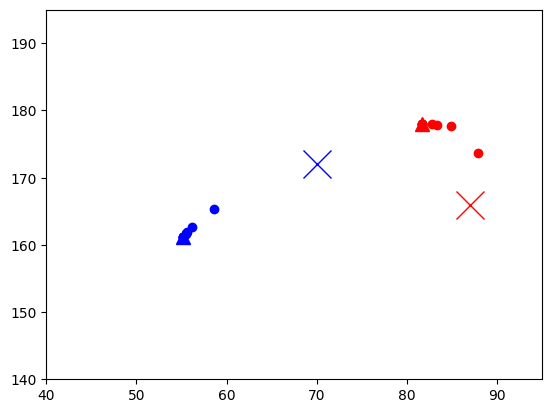

In [56]:
points = [
    [random.randint(40, 95), random.randint(140, 195)],
    [random.randint(40, 95), random.randint(140, 195)],
]
print('초기 기준점 :', points)
plt.plot(points[0][0], points[0][1], 'x', color='r', markersize=20)
plt.plot(points[1][0], points[1][1], 'x', color='b', markersize=20)
for i in range(1, 10):
    # 포인트 2지점 기준으로 group0과 group1나눔
    group0 = []
    group1 = []
    for d in data:
        if dist(d, points[0]) < dist(d, points[1]):
            group0.append(d)
        else:
            group1.append(d)
   

    
    # group0의 중간점, group1의 중간점으로 points 업데이트
    group0_mean_X = np.mean([d[0] for d in group0])
    group0_mean_Y = np.mean([d[1] for d in group0])
    points[0] = [group0_mean_X, group0_mean_Y]    
    group1_mean_X = np.mean([d[0] for d in group1])
    group1_mean_Y = np.mean([d[1] for d in group1])
    points[1] = [group1_mean_X, group1_mean_Y]
    
    
     # 포인트 출력
    print(i, '번째 points :', points)
    plt.plot(points[0][0], points[0][1], 'o', color='r')
    plt.plot(points[1][0], points[1][1], 'o', color='b')
plt.plot(points[0][0], points[0][1], '^', color='r', markersize=10)
plt.plot(points[1][0], points[1][1], '^', color='b', markersize=10)    
plt.xlim([40,95])
plt.ylim([140,195])

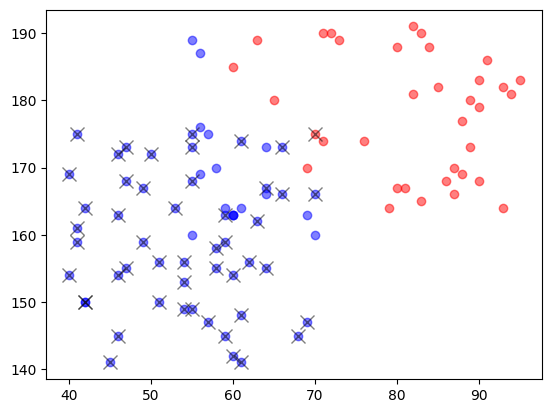

In [66]:
plt.plot([d[0] for d in group0],
         [d[1] for d in group0], 'o', color='r', alpha=0.5)
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', color='b', alpha=0.5)
plt.plot([d[0] for d in data[::2]],
         [d[1] for d in data[::2]], 'x', color='k', alpha=0.5, markersize=10)

# 4. api(sklearn)를 이용한 군집화
- sklearn :  머신러닝 패키지
    * 예측모델 : 분류, 회귀, 군집분석 - fit(학습), predict(예측-분류/회귀)
    * 변환모델 : 전처리시 사용 ex. 스케일조정 - fit(학습), transform(변환함수), fit_transform(학->변)

In [ ]:
# 군집분석 라이브러리가 경고 메세지(jablib 충돌) 출력할 경우
# import os
# os.environ['OMP_NUM_THREADS']= '1'

In [74]:
from sklearn.cluster import KMeans
data = np.array(data)
model = KMeans(n_clusters=2,  # 2개 그룹으로 군집
              init='random',  # 초기 기준점을 random하게
              n_init=10,      # 10번 실행
              random_state=7) # random 결과를 일관적으로 맞추기 위한 seed
model.fit(data)

KMeans(init='random', n_clusters=2, n_init=10, random_state=7)

In [72]:
# 기준점(중심점)
model.cluster_centers_

array([[ 79.64102564, 178.02564103],
       [ 54.78688525, 159.95081967]])

In [73]:
# 나눠진 그룹들의 인덱스
model.labels_

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
group0 = data[model.labels_==0]
group1 = data[model.labels_==1]

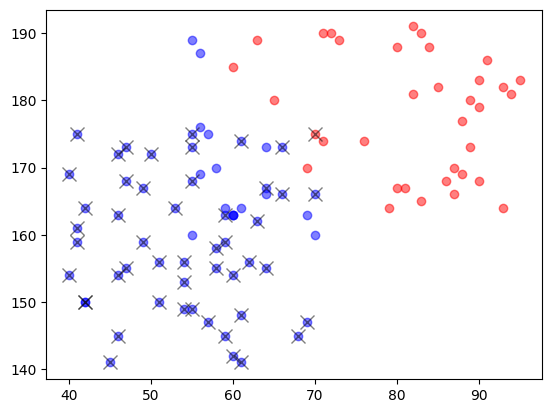

In [75]:
plt.plot([d[0] for d in group0],
         [d[1] for d in group0], 'o', color='r', alpha=0.5)
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', color='b', alpha=0.5)
plt.plot([d[0] for d in data[::2]],
         [d[1] for d in data[::2]], 'x', color='k', alpha=0.5, markersize=10)